## Exploratory Data Analysis for Machine Learning

### Course Project for IBM Course

##### Bryan Kwok, 2020/11/08

## Introduction 

In this project, we will take the dataset from the public database provided by Jason Brownlee in the website Machine Learning Mastery. We will first introduce and illustrate the content of the dataset.

Then we will show the statistics and some hypthesis we made in this dataset. After performing some simple pearson correlation tests, we will summarise the results and suggest some possible work that could be done in the future.

In [112]:
### Install the libraries required in this project
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

## Boston House Price Dataset

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details of the house and its neighborhood.

There are 506 observations with 13 input variables and 1 output variable. The variable names are as follows:


- CRIM: per capita crime rate by town.
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of nonretail business acres per town.
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- NOX: nitric oxides concentration (parts per 10 million).
- RM: average number of rooms per dwelling.
- AGE: proportion of owner-occupied units built prior to 1940.
- DIS: weighted distances to five Boston employment centers.
- RAD: index of accessibility to radial highways.
- TAX: full-value property-tax rate per 10,000USD.
- PTRATIO: pupil-teacher ratio by town.
- B: 1000(Bk – 0.63)^2 where Bk is the proportion of blacks by town.
- LSTAT: % lower status of the population.
- MEDV: Median value of owner-occupied homes in $1000s.

Reference: _https://machinelearningmastery.com/standard-machine-learning-datasets/_

At first, we illustrate the dataset with the first 5 rows.

In [49]:
filepath = "housing.data.csv"
df = pd.read_csv(filepath,header=None)
df.columns = ['CRIM','ZN',"INDUS",'CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Then we learn a bit more from the data, such as the number of data points, columns names and data types.

In [43]:
print('The number of data points is',df.shape[0])
print('\nThe columns name are:\n',df.columns[0:14])
print('\nThe data types are shown as below:\n',df.dtypes)

The number of data points is 506

The columns name are:
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

The data types are shown as below:
 CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


Let's check and remove the missing data from the data set.

In [82]:
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64

It is shown that there are 54 missing data in the column of Median value of owner-occupied homes. 

In the next steps, we will try to filter out these rows with missing data.

In [86]:
df = df.dropna()
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

The statistics of the cleaned dataset is given as below:

In [87]:
stats_df = df.describe()
stats_df

stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
mean,1.420825,12.721239,10.304889,0.077434,0.540816,6.343538,65.557965,4.04357,7.823009,377.442478,18.247124,369.826504,11.441881,23.750442
25%,0.069875,0.000000,4.930000,0.000000,0.447000,5.926750,40.950000,2.35475,4.000000,276.750000,16.800000,377.717500,6.587500,18.500000
median,0.191030,0.000000,8.140000,0.000000,0.519000,6.229000,71.800000,3.55040,5.000000,307.000000,18.600000,392.080000,10.250000,21.950000
75%,1.211460,20.000000,18.100000,0.000000,0.605000,6.635000,91.625000,5.40110,7.000000,411.000000,20.200000,396.157500,15.105000,26.600000
range,9.960220,100.000000,27.280000,1.000000,0.486000,5.219000,97.100000,10.99690,23.000000,524.000000,9.400000,396.580000,32.680000,43.700000


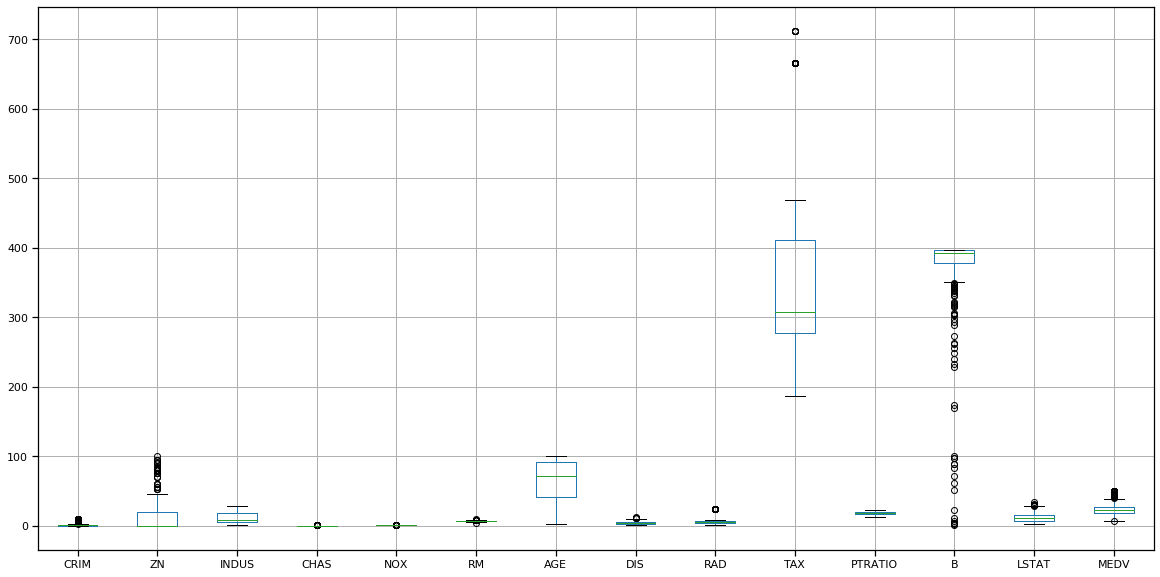

In [92]:
boxplot = df.boxplot(column=['CRIM','ZN',"INDUS",'CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'],figsize = (20,10))

According to the above table, it is shown that there are 4 columns with more outliers. They are variables 'CRIM', 'ZN', 'RM' and 'B'.

<Figure size 2000x1000 with 0 Axes>

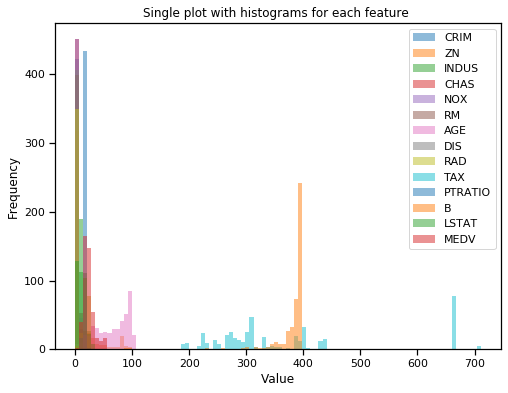

In [88]:
fig = plt.figure(figsize = (20,10),dpi=100)

### BEGIN SOLUTION
# This uses the `.plot.hist` method
ax = df.plot.hist(bins=100, alpha=0.5, figsize=(8,6))
ax.set_title("Single plot with histograms for each feature ")
ax.set_xlabel('Value');

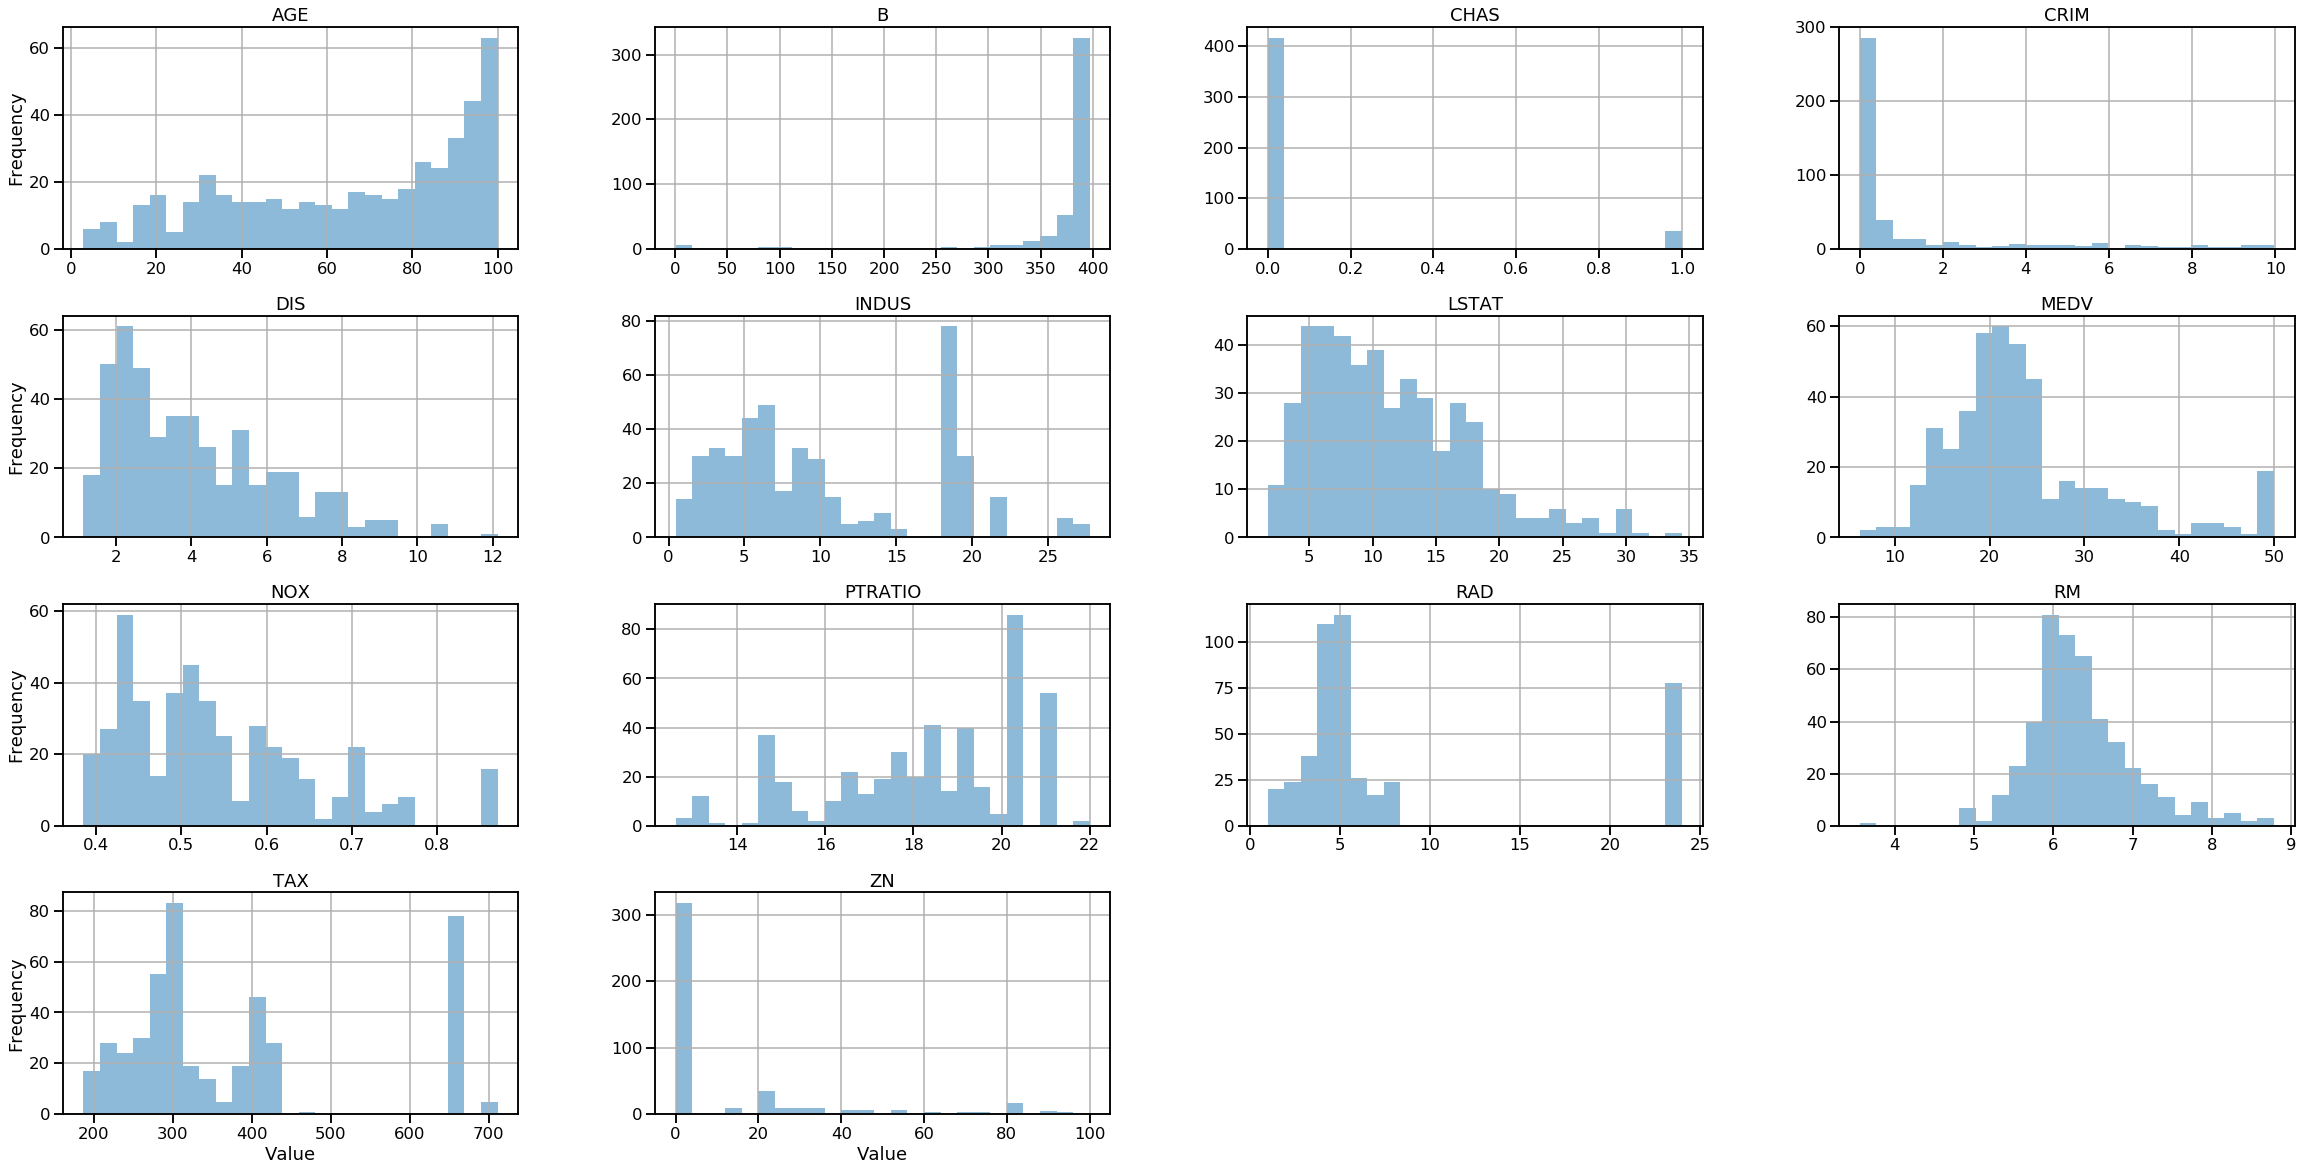

In [134]:
axList = df.hist(bins=25,alpha=0.5, figsize=(40,20))

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Value')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

#axList.set_title("Multiple plots with histograms for each feature ")


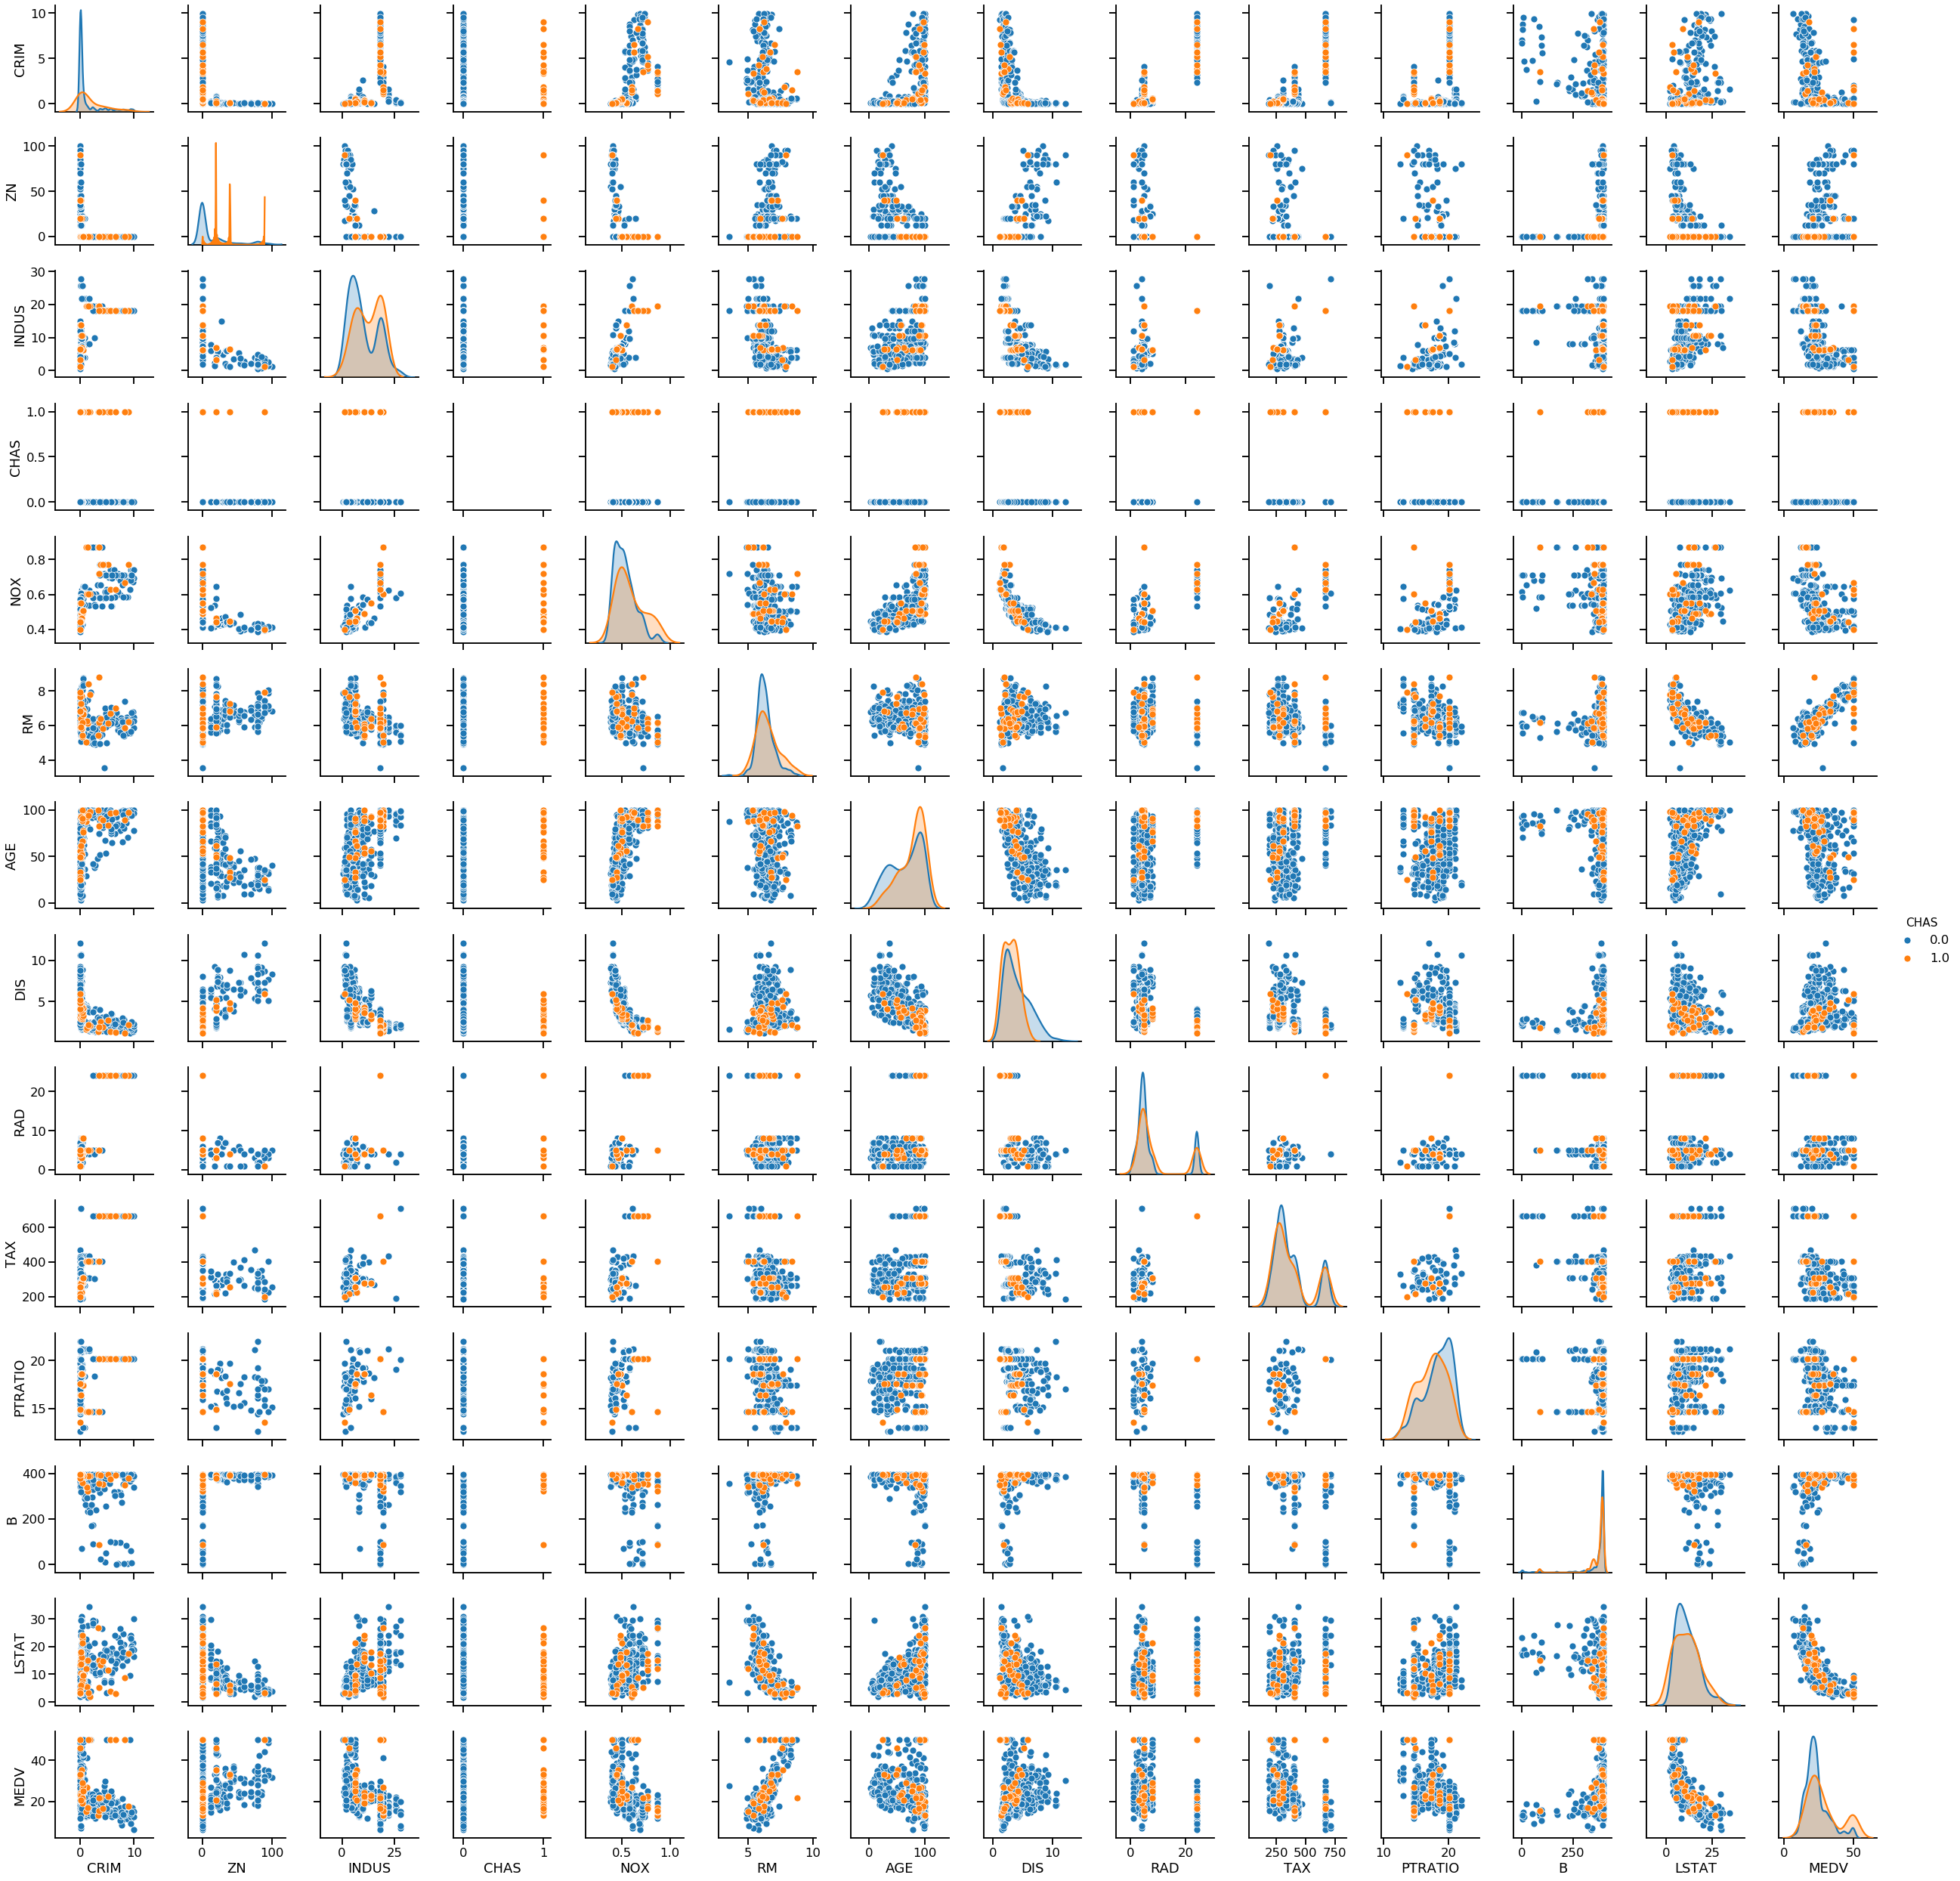

In [119]:
#sns.set_context('talk')
sns.pairplot(df, hue='CHAS');

Text(0.5, 1, 'Correlation plots between 13 variables in Boston Housing')

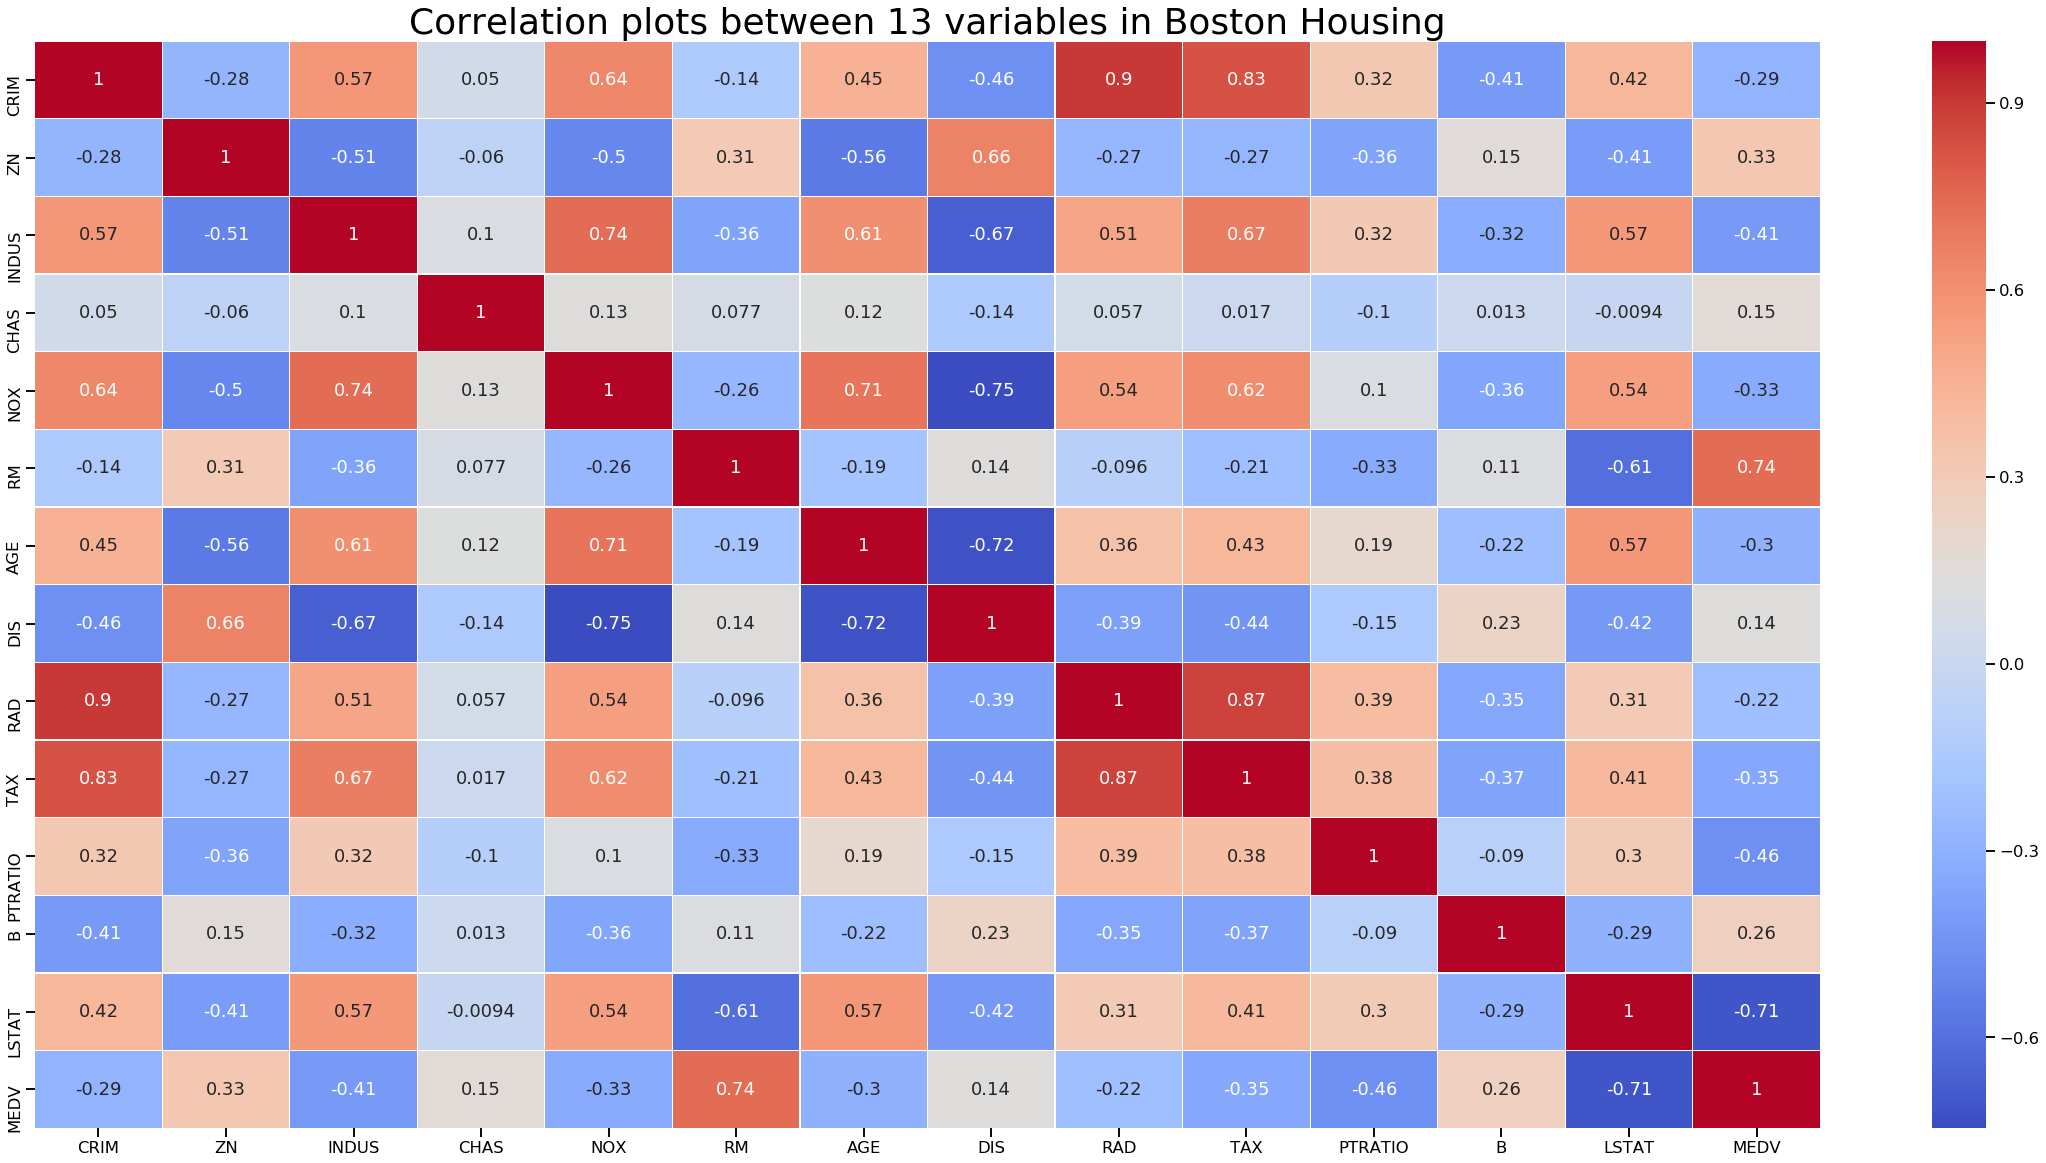

In [142]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (40, 20)) 
sns.heatmap(corr, cmap ='coolwarm', linewidths = 0.25, annot = True)
ax.set_title("Correlation plots between 13 variables in Boston Housing",size="36")

### Three hypothesis about this dataset

#### Hypothesis 1:

- Null Hypothesis (H0): The higher crime rate results in the lower house price.

- Alternative Hypothesis (H1): The higher crime rate doesn't result in the lower house price.

Set α to be 0.05 which is referred to 95% confidence level.

In [115]:
X1 = df['CRIM'].array
Y1 = df['MEDV'].array
result = stats.pearsonr(X1,Y1)
print(result)
# (Pearson’s correlation coefficient, Two-tailed p-value)

(-0.2862449855687187, 5.683015508556722e-10)


As the p-value is shown from the Pearson Correlation test, the p-value (5.683e-10) is way less than significance level of 0.05. Therefore, we shall reject null hypothesis(The higher crime rate results in the lower house price) based on the p-value output from Pearson test.

#### Hypothesis 2:

- Null Hypothesis (H0): The accessibility to radial highways affects house price.

- Alternative Hypothesis (H1): The accessibility to radial highways doesn't affect the lower house price.

Set α to be 0.05 which is referred to 95% confidence level.

In [116]:
X2 = df['RAD'].array
Y2 = df['MEDV'].array
result = stats.pearsonr(X2,Y)
print(result)
# (Pearson’s correlation coefficient, Two-tailed p-value)

(-0.21790209732657095, 2.9232382333079248e-06)


As the p-value is shown from the Pearson Correlation test, the p-value (2.923e-06) is way less than significance level of 0.05. Therefore, we shall reject null hypothesis(The accessibility to radial highways affects house price.) based on the p-value output from Pearson test.

#### Hypothesis 3:

- Null Hypothesis (H0): The property tax rate for Boston Housing is related to the Charles River dummy variable.

- Alternative Hypothesis (H1): The property tax rate for Boston Housing is not related to the Charles River dummy variable.

Set α to be 0.05 which is referred to 95% confidence level.

In [144]:
X3 = df['CHAS'].array
Y3 = df['TAX'].array
result = stats.pearsonr(X3,Y3)
print(result)
# (Pearson’s correlation coefficient, Two-tailed p-value)

(0.01689408538047445, 0.7201905100272031)


As the p-value is shown from the Pearson Correlation test, the p-value (0.72) is greater than significance level of 0.05. Therefore, we shall not reject null hypothesis(The property tax rate for Boston Housing is related to the Charles River dummy variable.) based on the p-value output from Pearson test.

### Suggestions for next steps in analyzing this data

It is suggested to perform a regression model on this dataset and see whether we can predict the house price by these 13 variables. The p-value of the regression model should be tested whether it is significant enough to reject the null hypothesis.

### Summary

We have conducted an exploratory data analysis in this Boston Housing Dataset. It is found that approxiamately 10% of missing data of the house price exists in this data. 

The quality of data is quite satisfactory. Most of the outliers are found in the vairable "Crime Rate", "Proportion of residential land zoned", "Average number of rooms per dwelling" and "Proportion of Blacks in the town".

We have performed 3 hypothesis tests regarding the correlation of the prices and each variables. Two of them rejected the null hypothesis and one doesn't reject the null hyptohesis.

For recommendation, it is suggested that regression analysis can be conducted in the future so that the relationship of house price and different variable might be explained by the mathematical expression. The validity of the model can be further tested by the hypothesis test and p-value as well.